<a href="https://colab.research.google.com/github/arunmadapathi-1609/Implementing_Linear_Regression_Model.ipynb/blob/main/Implementing_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Linear_Regression:

  def __init__(self,learning_rate,no_of_iterations):

    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,x,y):
    self.m,self.n=x.shape
    self.w=np.zeros(self.n)
    self.b=0
    self.x=x
    self.y=y
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    y_prediction=self.predict(self.x)
    dw=-(2*(self.x.T).dot(self.y-y_prediction))/self.m
    db=-(2*np.sum(self.y-y_prediction))/self.m
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def predict(self,x):
    return x.dot(self.w)+self.b

In [4]:
salary_dataset=pd.read_csv('/content/salary_data.csv')

In [5]:
salary_dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
salary_dataset.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
salary_dataset.shape

(30, 2)

In [8]:
salary_dataset.isnull().sum()

,0
YearsExperience,0
Salary,0


In [9]:
X = salary_dataset.iloc[:, :-1].values
y = salary_dataset.iloc[:, 1].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [11]:
model = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Print the learned weights and bias
print(f"Learned weights (w): {model.w}")
print(f"Learned bias (b): {model.b}")

Learned weights (w): [9380.83169122]
Learned bias (b): 26347.53232439376


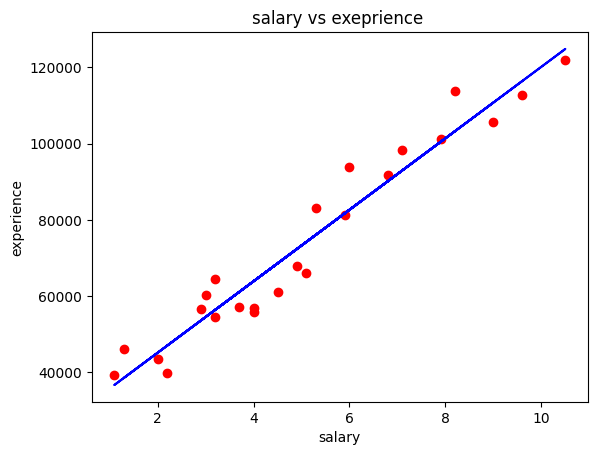

In [12]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train, model.predict(X_train) , color='blue')
plt.title('salary vs exeprience ')
plt.xlabel('salary')
plt.ylabel('experience')
plt.show()